In [14]:
%matplotlib inline
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
from ema_workbench.em_framework.salib_samplers import get_SALib_problem

from SALib.analyze import sobol
from ema_workbench import (RealParameter, CategoricalParameter, IntegerParameter, ema_logging)

In [3]:
uncertainties = pd.read_csv("data/experimentssobol.csv").drop(columns = 'Unnamed: 0')
outcomes = pd.read_csv("data/outcomessobol.csv").drop(columns = 'Unnamed: 0')

In [6]:
uncertainties.head()

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,4_RfR 0,EWS_DaysToThreat,A.1_DikeIncrease 0,A.2_DikeIncrease 0,A.3_DikeIncrease 0,A.4_DikeIncrease 0,A.5_DikeIncrease 0,scenario,policy,model
0,0.0,150.46875,1.5,0.486816,208.28125,10.0,0.241699,217.96875,10.0,0.671387,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,Policy 0,dikesnet
1,26.0,150.46875,1.5,0.486816,208.28125,10.0,0.241699,217.96875,10.0,0.671387,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,Policy 0,dikesnet
2,0.0,202.34375,1.5,0.486816,208.28125,10.0,0.241699,217.96875,10.0,0.671387,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,Policy 0,dikesnet
3,0.0,150.46875,1.5,0.486816,208.28125,10.0,0.241699,217.96875,10.0,0.671387,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,Policy 0,dikesnet
4,0.0,150.46875,1.5,0.524902,208.28125,10.0,0.241699,217.96875,10.0,0.671387,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,Policy 0,dikesnet


In [7]:
outcomes.head()

,All Costs,Expected Number of Deaths
0,6.057839e+07,0.140858
1,6.029320e+07,0.140112
2,6.057730e+07,0.140854
3,6.057839e+07,0.140858
4,4.892892e+07,0.117873


In [12]:
uncertainties.columns[:17]

Index(['A.0_ID flood wave shape', 'A.1_Bmax', 'A.1_Brate', 'A.1_pfail',
       'A.2_Bmax', 'A.2_Brate', 'A.2_pfail', 'A.3_Bmax', 'A.3_Brate',
       'A.3_pfail', 'A.4_Bmax', 'A.4_Brate', 'A.4_pfail', 'A.5_Bmax',
       'A.5_Brate', 'A.5_pfail', 'discount rate 0'],
      dtype='object')

In [15]:
uncertainties_for_sobol = \
[CategoricalParameter('discount rate 0', [0, 1, 2, 3]), 
 IntegerParameter('A.0_ID flood wave shape', 0, 132),
 RealParameter('A.1_Bmax', 30, 350),
 RealParameter('A.1_pfail', 0, 1),
 CategoricalParameter('A.1_Brate', [0, 1, 2]),
 RealParameter('A.2_Bmax', 30, 350),
 RealParameter('A.2_pfail', 0, 1),
 CategoricalParameter('A.2_Brate', [0, 1, 2]),
 RealParameter('A.3_Bmax', 30, 350),
 RealParameter('A.3_pfail', 0, 1),
 CategoricalParameter('A.3_Brate', [0, 1, 2]),
 RealParameter('A.4_Bmax', 30, 350),
 RealParameter('A.4_pfail', 0, 1),
 CategoricalParameter('A.4_Brate', [0, 1, 2]),
 RealParameter('A.5_Bmax', 30, 350),
 RealParameter('A.5_pfail', 0, 1),
 CategoricalParameter('A.5_Brate', [0, 1, 2])]

In [16]:
uncertainties_for_sobol

[CategoricalParameter('discount rate 0', [0, 1, 2, 3]),
 IntegerParameter('A.0_ID flood wave shape', 0, 132),
 RealParameter('A.1_Bmax', 30, 350),
 RealParameter('A.1_pfail', 0, 1),
 CategoricalParameter('A.1_Brate', [0, 1, 2]),
 RealParameter('A.2_Bmax', 30, 350),
 RealParameter('A.2_pfail', 0, 1),
 CategoricalParameter('A.2_Brate', [0, 1, 2]),
 RealParameter('A.3_Bmax', 30, 350),
 RealParameter('A.3_pfail', 0, 1),
 CategoricalParameter('A.3_Brate', [0, 1, 2]),
 RealParameter('A.4_Bmax', 30, 350),
 RealParameter('A.4_pfail', 0, 1),
 CategoricalParameter('A.4_Brate', [0, 1, 2]),
 RealParameter('A.5_Bmax', 30, 350),
 RealParameter('A.5_pfail', 0, 1),
 CategoricalParameter('A.5_Brate', [0, 1, 2])]

In [17]:
problem = get_SALib_problem(uncertainties_for_sobol)
print(problem)

{'num_vars': 17, 'names': ['A.0_ID flood wave shape', 'A.1_Bmax', 'A.1_Brate', 'A.1_pfail', 'A.2_Bmax', 'A.2_Brate', 'A.2_pfail', 'A.3_Bmax', 'A.3_Brate', 'A.3_pfail', 'A.4_Bmax', 'A.4_Brate', 'A.4_pfail', 'A.5_Bmax', 'A.5_Brate', 'A.5_pfail', 'discount rate 0'], 'bounds': [(0, 133), (30, 350), (0, 3), (0, 1), (30, 350), (0, 3), (0, 1), (30, 350), (0, 3), (0, 1), (30, 350), (0, 3), (0, 1), (30, 350), (0, 3), (0, 1), (0, 4)]}


In [18]:
Si = sobol.analyze(problem, np.array(outcomes['All Costs']), calc_second_order=True, print_to_console=True)

Parameter S1 S1_conf ST ST_conf
A.0_ID flood wave shape 0.000554 0.005589 0.004500 0.000717
A.1_Bmax -0.003038 0.010897 0.014633 0.004411
A.1_Brate 0.000487 0.001134 0.000108 0.000079
A.1_pfail 0.695930 0.060210 0.736973 0.057617
A.2_Bmax -0.000095 0.001583 0.000269 0.000133
A.2_Brate 0.000264 0.000267 0.000012 0.000012
A.2_pfail 0.022069 0.015043 0.023775 0.004413
A.3_Bmax 0.000374 0.000952 0.000129 0.000126
A.3_Brate 0.000218 0.000368 0.000016 0.000012
A.3_pfail 0.199938 0.045994 0.263300 0.030409
A.4_Bmax 0.000140 0.000299 0.000012 0.000014
A.4_Brate -0.000038 0.000077 0.000001 0.000001
A.4_pfail 0.001046 0.003093 0.001428 0.000468
A.5_Bmax 0.000000 0.000000 0.000000 0.000000
A.5_Brate 0.000000 0.000000 0.000000 0.000000
A.5_pfail 0.017430 0.012416 0.020402 0.004230
discount rate 0 0.014649 0.012926 0.020720 0.002321

Parameter_1 Parameter_2 S2 S2_conf
A.0_ID flood wave shape A.1_Bmax 0.001472 0.009715
A.0_ID flood wave shape A.1_Brate 0.000712 0.009640
A.0_ID flood wave shape A.1_p

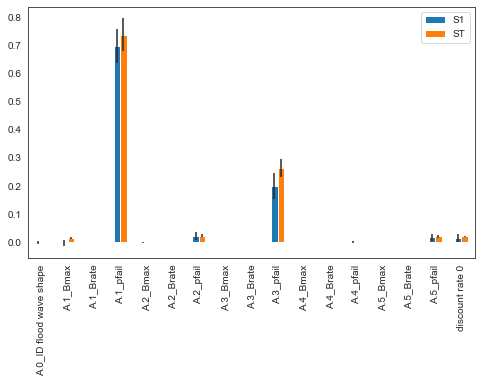

In [19]:
Si_filter = {k:Si[k] for k in ['ST','ST_conf','S1','S1_conf']}
Si_df = pd.DataFrame(Si_filter, index=problem['names'])

sns.set_style('white')
fig, ax = plt.subplots(1)

indices = Si_df[['S1','ST']]
err = Si_df[['S1_conf','ST_conf']]

indices.plot.bar(yerr=err.values.T,ax=ax)
fig.set_size_inches(8,6)
fig.subplots_adjust(bottom=0.3)
plt.show()

Convergence of SOBOL:

In [21]:
Y = np.array(outcomes['All Costs'])

s_data = pd.DataFrame(index=problem['names'],
                      columns=np.arange(20,1000,50)*(2*problem['num_vars']+2))
for j in s_data.columns:
    scores = sobol.analyze(problem, Y[0:j], calc_second_order=True, print_to_console=False)
    s_data.loc[:,j] = scores['ST']

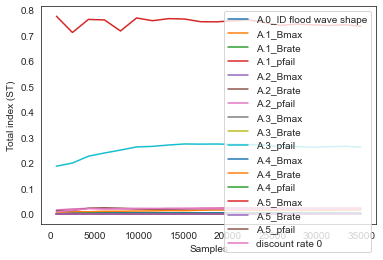

In [23]:
fig, ax = plt.subplots(1)

s_data.T.plot(ax=ax)
ax.set_xlabel('Samples')
ax.set_ylabel('Total index (ST)')
plt.show()

A bit hard to interpret

## Extra Trees

In [26]:
from ema_workbench.analysis import feature_scoring
from ema_workbench.analysis.scenario_discovery_util import RuleInductionType

In [29]:
scores = feature_scoring.get_ex_feature_scores(uncertainties, np.array(outcomes['All Costs']),
                                      max_features=0.6, mode=RuleInductionType.REGRESSION)[0]
scores.head(10)

,1
0,
A.1_pfail,0.679295
A.3_pfail,0.217354
discount rate 0,0.020184
A.2_pfail,0.018013
A.5_pfail,0.014676
A.1_Bmax,0.011316
A.4_pfail,0.004180
A.4_Bmax,0.004024


In [34]:
# takes too long, convergence of tree feature scores
# combined_scores = []
# for j in range(100, uncertainties.shape[0], 100):
#     scores = feature_scoring.get_ex_feature_scores(uncertainties.iloc[0:j, :],
#                                                    np.array(outcomes['All Costs'])[0:j],
#                                                    max_features=0.6,
#                                                    mode=RuleInductionType.REGRESSION)[0]
#     scores.columns = [j]
#     combined_scores.append(scores)

In [35]:
# combined_scores = pd.concat(combined_scores, axis=1, sort=True)
# fig, ax = plt.subplots(1)

# combined_scores.T.plot(ax=ax)
# ax.legend(bbox_to_anchor=(1,1))
# ax.set_xlabel('Samples')
# ax.set_ylabel('feature scores')
# plt.show()